Dataset shape: (33208, 5)

Missing values per column:
compound_id          0
canonical_smiles     0
standard_type        0
standard_value_nM    0
activity_label       0
dtype: int64

Data types and non-null counts:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33208 entries, 0 to 33207
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   compound_id        33208 non-null  object 
 1   canonical_smiles   33208 non-null  object 
 2   standard_type      33208 non-null  object 
 3   standard_value_nM  33208 non-null  float64
 4   activity_label     33208 non-null  int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 1.3+ MB
None


C:\Users\USER\AppData\Local\Temp\ipykernel_24240\1206551715.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='activity_label', data=df, palette='viridis')


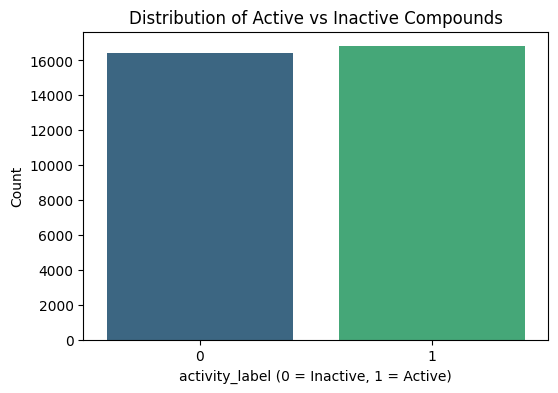


Sample SMILES strings:
6273     CC1(OC(=O)C(=O)N(Cc2ccccc2)Cc2ccccc2)CCC2CC1OO...
9292     CCCCCN(C#N)N(C)C(=O)[C@H](Cc1ccccc1)NC(=O)OCc1...
9893             CCCCc1ccc(/C=C2\Oc3cc(OC)cc(OC)c3C2=O)cc1
12554             CCOC(=O)c1sc(SC(C)C)c(C#N)c1-c1ccc(O)cc1
13483      CC[N+](CC)(CCO)CCCCC[N+](CC)(CC)CCO.[Br-].[Br-]
Name: canonical_smiles, dtype: object


In [1]:
# notebooks/eda.ipynb

# 1. Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
import numpy as np

# 2. Set paths
DATA_PATH = Path("../data/merged_dataset.csv")

# 3. Load dataset
df = pd.read_csv(DATA_PATH)

# 4. Quick look at data
print("Dataset shape:", df.shape)
df.head()

# 5. Check for missing values
print("\nMissing values per column:")
print(df.isnull().sum())

# 6. Check basic info
print("\nData types and non-null counts:")
print(df.info())

# 7. Class distribution
plt.figure(figsize=(6,4))
sns.countplot(x='activity_label', data=df, palette='viridis')
plt.title('Distribution of Active vs Inactive Compounds')
plt.xlabel('activity_label (0 = Inactive, 1 = Active)')
plt.ylabel('Count')
plt.show()

# 8. Preview some SMILES
print("\nSample SMILES strings:")
print(df['canonical_smiles'].sample(5))



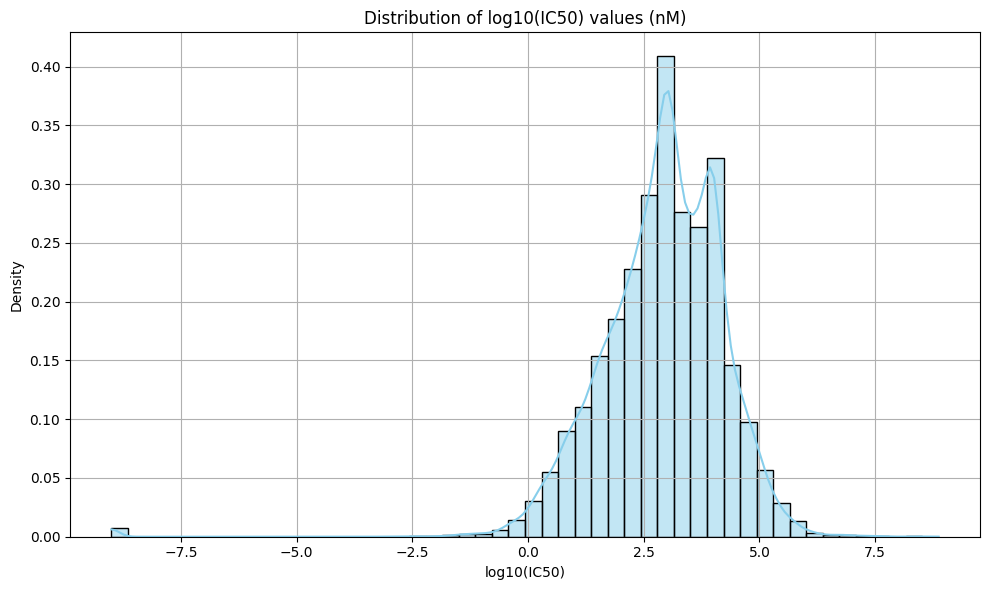

In [2]:

df['log_ic50'] = df['standard_value_nM'].apply(lambda x: np.log10(x + 1e-9))

plt.figure(figsize=(10, 6))
sns.histplot(df['log_ic50'], kde=True, bins=50, color="skyblue", stat="density")
plt.title("Distribution of log10(IC50) values (nM)")
plt.xlabel("log10(IC50)")
plt.ylabel("Density")
plt.grid(True)
plt.tight_layout()
plt.show()

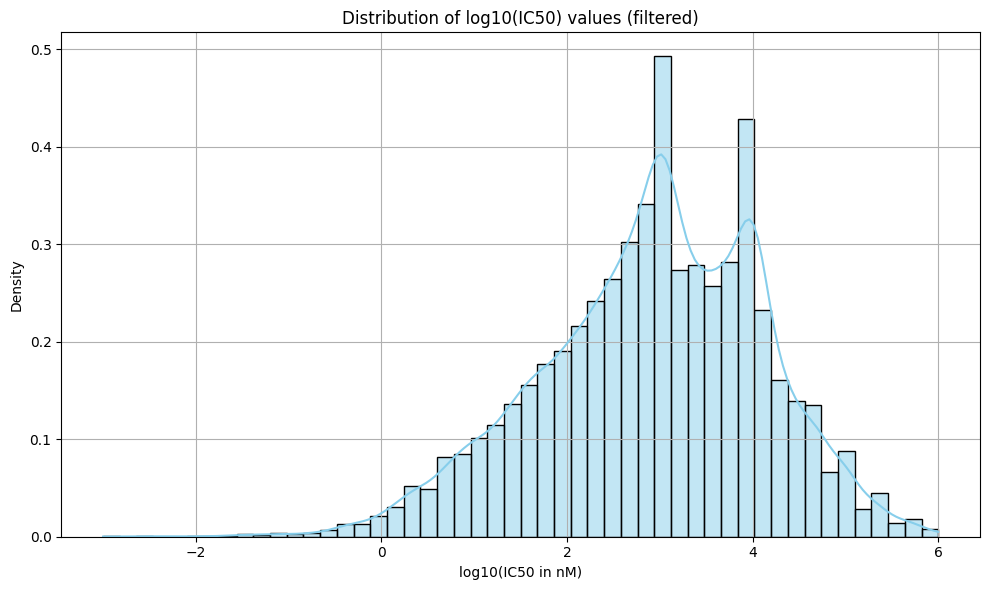

In [3]:
df_filtered = df[(df['standard_value_nM'] <= 1e6) & (df['standard_value_nM'] >= 1e-3)].copy()

# Log-transform IC50 values
df_filtered['log_ic50'] = np.log10(df_filtered['standard_value_nM'])

# Plot distribution
plt.figure(figsize=(10, 6))
sns.histplot(df_filtered['log_ic50'], kde=True, bins=50, color="skyblue", stat="density")
plt.title("Distribution of log10(IC50) values (filtered)")
plt.xlabel("log10(IC50 in nM)")
plt.ylabel("Density")
plt.grid(True)
plt.tight_layout()
plt.show()